# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
# Checking the number of mice.
merged_df["Mouse ID"].value_counts().size

249

In [61]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_dup_mouse_id = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep='first')]
unique_dup_mouse_id["Mouse ID"].unique()

array(['g989'], dtype=object)

In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
unique_dup_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_mouse_df = merged_df.loc[merged_df["Mouse ID"] != "g989"]
updated_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
# Checking the number of mice in the clean DataFrame.
updated_mouse_df["Mouse ID"].value_counts().size

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_drug_regimen_df = updated_mouse_df.groupby(["Drug Regimen"]) #Grouped
grouped_drug_regimen_df.head()

indices = []
means = []
medians = []
variances = []
std_dev = []
sems = []

for drug_regimen, drug_column in grouped_drug_regimen_df:
    #Calculate Stats
    drug_mean = drug_column["Tumor Volume (mm3)"].mean()
    drug_median = drug_column["Tumor Volume (mm3)"].median()
    drug_variances = drug_column["Tumor Volume (mm3)"].var()
    drug_std_devs = drug_column["Tumor Volume (mm3)"].std()
    drug_sem = drug_column["Tumor Volume (mm3)"].sem()

    #Append to list
    indices.append(drug_regimen)
    means.append(drug_mean)
    medians.append(drug_median)
    variances.append(drug_variances)
    std_dev.append(drug_std_devs)
    sems.append(drug_sem)

#Do a Dataframe
drug_summary_df = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variances,
    "Tumor Volume Std. Dev": std_dev,
    "Tumor Volume Std. Err.": sems
}, index=grouped_drug_regimen_df.indices)

drug_summary_df.index.names = ["Drug Regimen"]

drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_agg_df = grouped_drug_regimen_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

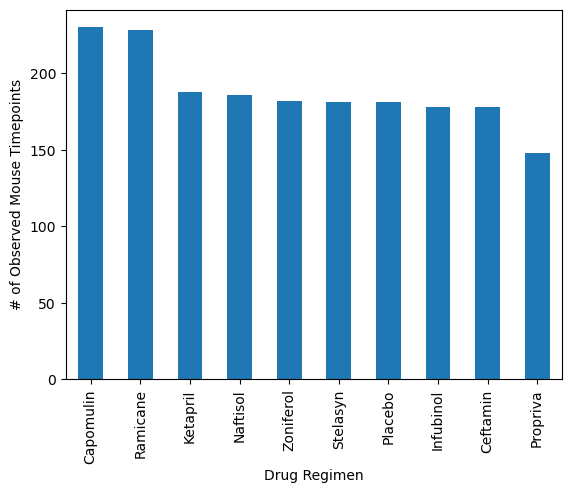

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_and_mice = updated_mouse_df["Drug Regimen"].value_counts()
drug_and_mice_bar = drug_and_mice.plot(kind="bar",
                   xlabel="Drug Regimen",
                   ylabel="# of Observed Mouse Timepoints")

xticklabels = drug_and_mice.index
drug_and_mice_bar.set_xticklabels(xticklabels)

# drug_and_mice
plt.show()


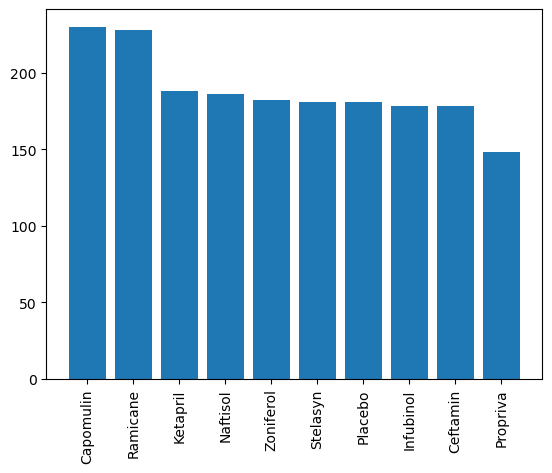

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_and_mice.index))
plt.bar(x_axis, drug_and_mice)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_and_mice.index, rotation='vertical')
plt.show()

<Axes: ylabel='Sex'>

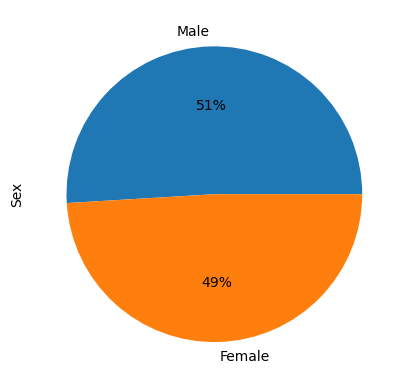

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female_mice = updated_mouse_df["Sex"].value_counts()
male_vs_female_mice_pie = male_vs_female_mice.plot(kind="pie", ylabel="Sex", autopct='%1.0f%%')
male_vs_female_mice_pie


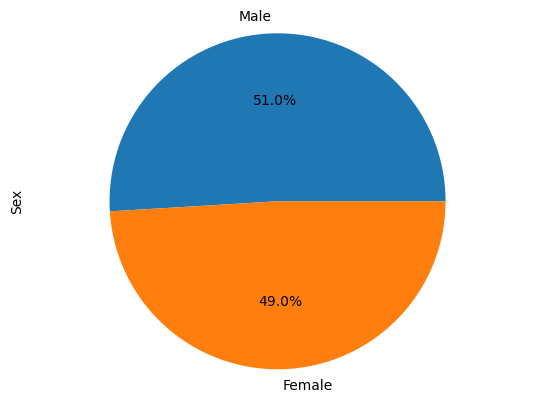

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = male_vs_female_mice.index
pie_info = male_vs_female_mice
plt.pie(pie_info, labels=pies, autopct='%1.1f%%')
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_mouse_timepoint = updated_mouse_df.groupby("Mouse ID")["Timepoint"].max()
max_mouse_timepoint = max_mouse_timepoint.reset_index()
max_mouse_timepoint.columns = ["Mouse ID", "Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_mouse_df = pd.merge(max_mouse_timepoint, updated_mouse_df, on=["Mouse ID", "Timepoint"], how="left" )
greatest_timepoint_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    subset = greatest_timepoint_mouse_df.loc[greatest_timepoint_mouse_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]

    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


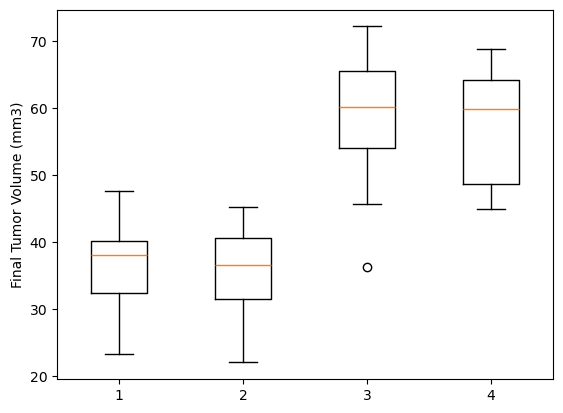

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

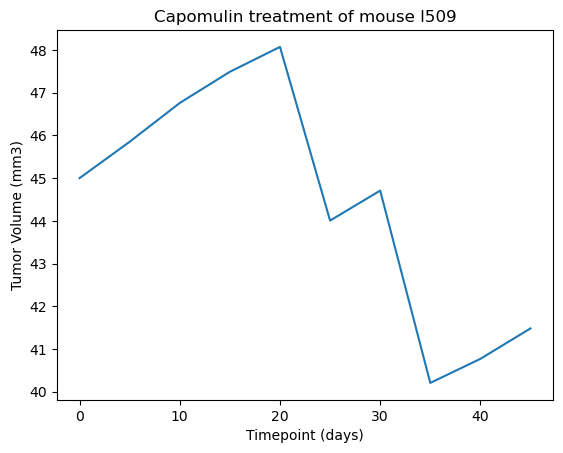

In [82]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Get the new Dataframe
capomulin_tp = updated_mouse_df.loc[(updated_mouse_df['Mouse ID'] == "l509") & (updated_mouse_df['Drug Regimen'] == 'Capomulin')]

#plot the graph
plt.plot(capomulin_tp["Timepoint"], capomulin_tp["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

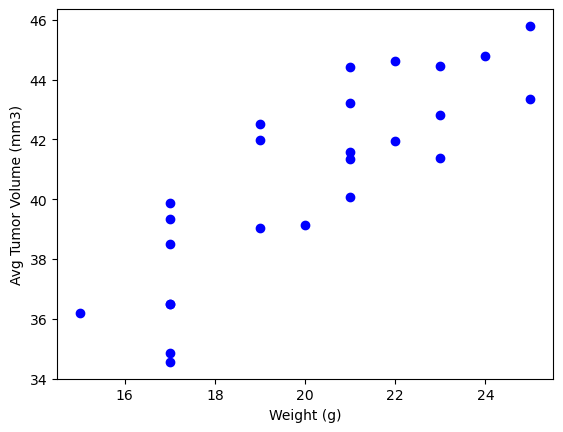

In [78]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter Data
cap_df = updated_mouse_df.loc[updated_mouse_df["Drug Regimen"] == "Capomulin"]

#Retrieve the weight and average
sct_tumor_vol = cap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"]
avg_sct_tumor_vol = sct_tumor_vol.mean().reset_index()

#Rename the column changed
avg_sct_tumor_vol = avg_sct_tumor_vol.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})

#Plot the graph
plt.scatter(avg_sct_tumor_vol["Weight (g)"], avg_sct_tumor_vol["Avg Tumor Volume (mm3)"], marker="o", color="b")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

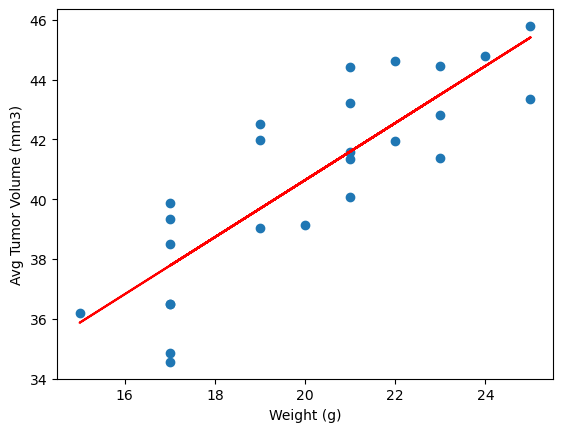

The correlation between mouse weight and the average tumor volume is 0.84


In [81]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_sct_tumor_vol["Weight (g)"]
y_values = avg_sct_tumor_vol["Avg Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")